In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from collections import Counter, defaultdict
sns.set_context("notebook")
sns.set_style("white")
%matplotlib inline

In [3]:
df_news = pd.read_pickle("df_news.pkl")

In [18]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [16]:
def plot_dist(dlist, vlist, label="", offset=0, color="r"):
    cnt = Counter(dlist)
    dist_vec = np.array([cnt[t] for t in vlist], dtype=float)
    dist_vec = dist_vec / np.sum(dist_vec)
    
    plt.bar(np.arange(len(vlist))+offset, dist_vec, width=0.3, color=color, label=label)
    plt.legend()
    plt.xticks(np.arange(len(vlist)), vlist)

# 点击与偏好

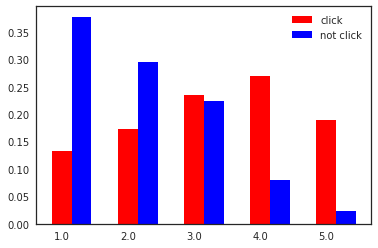

In [17]:
plot_dist(df_news[df_news['ifclick']]['post_pref'], vlist=np.arange(1, 6, dtype=float), label="click")
plot_dist(df_news[(df_news['ifview']) & df_news['ifclick'] == False]['post_pref'], vlist=np.arange(1, 6, dtype=float), label="not click", offset=0.3, color="b")